In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# This line makes your plots appear directly in the notebook
%matplotlib inline

In [2]:
# Load the dataset, which is already split into training and testing sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)


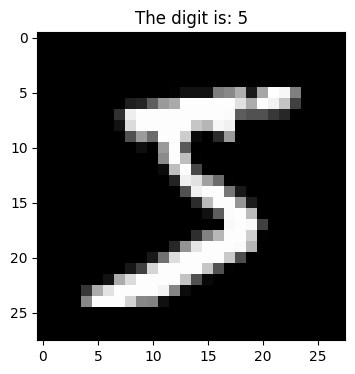

In [3]:
# Check the shape of the training data
print("Shape of training images:", x_train.shape) # (60000, 28, 28)
print("Shape of training labels:", y_train.shape) # (60000,)

# Display the first image in the training set
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"The digit is: {y_train[0]}")
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
# We divide by 255.0 (using a float) to ensure the result is a float
x_train = x_train / 255.0
x_test = x_test / 255.0

# Check the new range of pixel values
print("Min pixel value after normalization:", x_train.min())
print("Max pixel value after normalization:", x_train.max())

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


In [5]:
# Create a Sequential model, which is a linear stack of layers
model = keras.Sequential([
    # 1. Input Layer: Flattens the 28x28 image into a 1D array of 784 pixels
    layers.Flatten(input_shape=(28, 28)),
    
    # 2. Hidden Layer: A standard Dense layer with 128 neurons
    # 'relu' (Rectified Linear Unit) is a common and effective activation function
    layers.Dense(128, activation='relu'),
    
    # 3. Output Layer: A Dense layer with 10 neurons (one for each digit)
    # 'softmax' converts the output into a probability distribution for the 10 classes
    layers.Dense(10, activation='softmax')
])

# Print a summary of the model's architecture
model.summary()

/Users/kajalmehta/.pyenv/versions/3.9.9/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train the model on the training data for 10 epochs
# An epoch is one complete pass through the entire training dataset.
history = model.fit(
    x_train, 
    y_train, 
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8684 - loss: 0.4585 - val_accuracy: 0.9597 - val_loss: 0.1328
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9608 - loss: 0.1283 - val_accuracy: 0.9708 - val_loss: 0.1017
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9744 - loss: 0.0848 - val_accuracy: 0.9738 - val_loss: 0.0910
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9740 - val_loss: 0.0885
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9778 - val_loss: 0.0805
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.9763 - val_loss: 0.0868
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.9934 -

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 456us/step - accuracy: 0.9800 - loss: 0.0795

Test accuracy: 0.9800000190734863


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


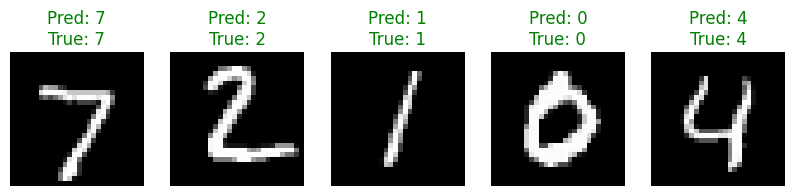

In [9]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Display the first 5 test images, their predicted labels, and their true labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    
    # Get the predicted digit by finding the index with the highest probability
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    
    # Set the title color to green for correct predictions, red for incorrect
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    
    plt.axis('off')
plt.show()